# Enhance Image Resolution for HEIC & JPEG Files

<br>

---

<br>

## Preliminary Package Management

In [ ]:
%pip install Pillow


In [ ]:
%pip install Pillow 'imageio[ffmpeg]'


In [ ]:
%pip install --use-pep517 pyheif

In [ ]:
%pip install pyheif


In [ ]:
%pip install python-dotenv


In [1]:
from PIL import Image
import imageio
import matplotlib.pyplot as plt
import subprocess
import os
from os import environ

Matplotlib is building the font cache; this may take a moment.


<br>

---

<br>

In [ ]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Get the directory path from the environment variable
heic_directory_path = os.getenv('HEIC_IMAGE_DIRECTORY_PATH')

if heic_directory_path:
    try:
        # List all files in the directory
        files = os.listdir(heic_directory_path)
        print(f"Files in {heic_directory_path}:")
        for file in files:
            print(file)
            
        # Optional: Read a specific file from the directory
        specific_file = "Mavericks_Logo.heic"  # Replace with the actual file name you want to read
        file_path = os.path.join(heic_directory_path, specific_file)
        
        if os.path.exists(file_path):
            with open(file_path, 'r') as file:
                file_content = file.read()
                print(f"\nContent of {specific_file}:\n")
                print(file_content)
        else:
            print(f"{specific_file} does not exist in the directory.")
            
    except FileNotFoundError:
        print(f"Directory not found: {heic_directory_path}")
else:
    print("Directory path not found in environment variables.")


<br>

---

<br>

In [12]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Get the directory path from the environment variable
heic_directory_path = os.getenv('HEIC_IMAGE_DIRECTORY_PATH')
jpeg_directory_path = os.getenv('JPEG_IMAGE_DIRECTORY_PATH')
enhanced_directory_path = os.getenv('Enhanced_IMAGE_DIRECTORY_PATH')

In [13]:
# Define the input and output paths
heic_path = heic_directory_path + "Mavericks_Logo.heic"
jpeg_path = jpeg_directory_path + "Mavericks_Logo.jpeg"
enhanced_image_path = enhanced_directory_path + "Mavericks_Logo.jpeg"


# Enhance JPEG Image

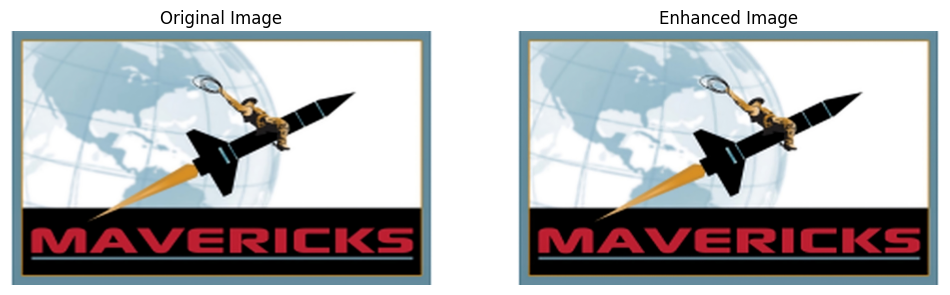

'/Users/shylaatchison/Images/Enhanced/Mavericks_Logo.jpeg'

In [14]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = jpeg_path
image = Image.open(image_path)

# Enhance resolution by resizing
enhanced_image = image.resize((image.width * 2, image.height * 2), Image.LANCZOS)

# Save the enhanced image
enhanced_image_path = enhanced_image_path
enhanced_image.save(enhanced_image_path)

# Display the original and enhanced images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(image)
ax1.set_title("Original Image")
ax1.axis('off')
ax2.imshow(enhanced_image)
ax2.set_title("Enhanced Image")
ax2.axis('off')
plt.show()

enhanced_image_path


<br>

---

<br>

# Further Enhance JPEG Image

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = enhanced_image_path
image = Image.open(image_path)

# Enhance resolution by resizing
enhanced_image = image.resize((image.width * 2, image.height * 2), Image.LANCZOS)

# Save the enhanced image
enhanced_image_path = enhanced_image_path
enhanced_image.save(enhanced_image_path)

# Display the original and enhanced images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(image)
ax1.set_title("Original Image")
ax1.axis('off')
ax2.imshow(enhanced_image)
ax2.set_title("Enhanced Image")
ax2.axis('off')
plt.show()

enhanced_image_path


<br>

---

<br>

# Alternative Image Enhancement Method

In [18]:
!pip install opencv-python opencv-python-headless opencv-contrib-python


  Using cached opencv_python_headless-4.10.0.84-cp311-cp311-macosx_10_16_x86_64.whl
  Using cached opencv-contrib-python-4.10.0.84.tar.gz (150.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done

In [ ]:
import cv2
import numpy as np
from PIL import Image

def enhance_image_resolution(image_path, model_path, scale=4):
    # Load the image
    image = cv2.imread(image_path)

    # Load the super resolution model
    sr = cv2.dnn_superres.DnnSuperResImpl_create()
    sr.readModel(model_path)
    sr.setModel("espcn", scale)

    # Upscale the image
    result = sr.upsample(image)

    # Convert the result to RGB format for displaying with PIL
    result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    return Image.fromarray(result_rgb)

# Define the paths
image_path = jpeg_path
model_path = '~/python-scripts/Image-Enhancement/ESPCN_x4.pb'

# Enhance the image resolution
enhanced_image = enhance_image_resolution(image_path, model_path)

# Show the enhanced image
enhanced_image.show()

# Save the enhanced image if needed
enhanced_image_path = enhanced_image_path
enhanced_image.save(enhanced_image_path)


<br>

---

<br>

# Other (Ignore Below, Contain Errors)

In [ ]:
import pyheif

# Convert HEIC to JPEG
heif_file = pyheif.read(image_path)
image = Image.frombytes(heif_file.mode, heif_file.size, heif_file.data, "raw", heif_file.mode, heif_file.stride)
jpeg_image_path = jpeg_path
image.save(jpeg_image_path, "JPEG")

# Enhance resolution by resizing
enhanced_image = image.resize((image.width * 2, image.height * 2), Image.LANCZOS)

# Save the enhanced image
enhanced_image_path = enhanced_image_path
enhanced_image.save(enhanced_image_path)

# Display the original and enhanced images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(image)
ax1.set_title("Original Image")
ax1.axis('off')
ax2.imshow(enhanced_image)
ax2.set_title("Enhanced Image")
ax2.axis('off')
plt.show()

enhanced_image_path


In [ ]:
# Read the HEIC file
heif_file = imageio.imread(heic_path, plugin='pyheif')

# Use a system call to convert HEIC to JPG using ImageMagick
subprocess.run(["convert", heic_path, jpeg_path])

# Load the converted image
image = Image.open(jpeg_path)

# Enhance resolution by resizing
enhanced_image = image.resize((image.width * 2, image.height * 2), Image.LANCZOS)

# Save the enhanced image
enhanced_image_path = enhanced_image_path
enhanced_image.save(enhanced_image_path)

# Display the original and enhanced images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(image)
ax1.set_title("Converted Image")
ax1.axis('off')
ax2.imshow(enhanced_image)
ax2.set_title("Enhanced Image")
ax2.axis('off')
plt.show()

enhanced_image_path


In [ ]:
# Convert to PIL Image
image = Image.fromarray(heif_file)

# Save as JPEG
jpeg_path = jpeg_path
image.save(jpeg_path, "JPEG")

# Enhance resolution by resizing
enhanced_image = image.resize((image.width * 2, image.height * 2), Image.Resampling.LANCZOS)

# Save the enhanced image
enhanced_image_path = enhanced_image_path
enhanced_image.save(enhanced_image_path)

# Display the original and enhanced images
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(image)
ax1.set_title("Converted Image")
ax1.axis('off')
ax2.imshow(enhanced_image)
ax2.set_title("Enhanced Image")
ax2.axis('off')
plt.show()

print("Enhanced image saved at:", enhanced_image_path)


In [ ]:
# Use a system call to convert HEIC to JPG using ImageMagick
subprocess.run(["convert", heic_path, jpeg_path])

# Load the converted image
image = Image.open(jpeg_path)

# Enhance resolution by resizing
enhanced_image = image.resize((image.width * 2, image.height * 2), Image.LANCZOS)

# Save the enhanced image
enhanced_image_path = enhanced_image_path
enhanced_image.save(enhanced_image_path)

# Display the original and enhanced images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(image)
ax1.set_title("Converted Image")
ax1.axis('off')
ax2.imshow(enhanced_image)
ax2.set_title("Enhanced Image")
ax2.axis('off')
plt.show()

enhanced_image_path

